In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

import stan_jupyter as stan
import pandas as pd

## Question 1

In [2]:
df_full = pd.read_csv("../data/Howell1.csv", delimiter=";")
df = df_full[df_full.age>=18].copy()

In [3]:
with open("models/w2_1.stan", "r") as f:
    model_code = f.read()

model_data = {"N":len(df),
              "weight":df.weight.tolist(),
              "height":df.height.tolist(),
              "X_BAR":df.height.mean()
             }
              

In [4]:
%%capture m1_build_log
m1_build = stan.build(model_code, model_data)

In [5]:
%%capture m1_fit_log
m1 = m1_build.sample(num_chains=4, num_samples=1000)

In [6]:
az.summary(m1)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha        45.004  0.227  44.592   45.437      0.004    0.003    3781.0   
beta          0.628  0.029   0.575    0.683      0.000    0.000    3507.0   
sigma         4.256  0.162   3.944    4.559      0.002    0.002    4618.0   
y_pred[0]    43.330  4.297  34.684   50.898      0.069    0.049    3828.0   
y_pred[1]    35.581  4.286  27.608   43.520      0.069    0.049    3892.0   
...             ...    ...     ...      ...        ...      ...       ...   
y_pred[347]  50.042  4.336  41.885   58.107      0.069    0.049    3986.0   
y_pred[348]  37.650  4.308  29.660   45.621      0.069    0.049    3948.0   
y_pred[349]  50.083  4.385  41.929   58.252      0.069    0.049    4044.0   
y_pred[350]  46.039  4.393  37.458   53.823      0.070    0.050    3884.0   
y_pred[351]  47.546  4.188  40.034   55.758      0.065    0.046    4099.0   

             ess_tail  r_hat  
alpha          3016.0    1.0  
beta           2901.0    1.0  
sigma          2820.0    1.0  
y_pred[0]      4014.0    1.0  
y_pred[1]      3927.0    1.0  
...               ...    ...  
y_pred[347]    3974.0    1.0  
y_pred[348]    3737.0    1.0  
y_pred[349]    3930.0    1.0  
y_pred[350]    3865.0    1.0  
y_pred[351]    3584.0    1.0  

[355 rows x 9 columns]

In [7]:
heights = [140, 160, 175]

for height in heights:
    pred_weight = stats.norm.rvs(loc = m1['alpha'] + m1['beta']*(height-df.height.mean()),
                                 scale=m1['sigma'])
    print(f"The average predicted weight for someone {height}cm tall is {pred_weight.mean().round(2)}kg.")
    print(f"The compatibility interval (HPDI) for such a weight is {az.hdi(pred_weight, .89)}.\n")

The average predicted weight for someone 140cm tall is 35.69kg.
The compatibility interval (HPDI) for such a weight is [28.94222473 42.41947217].

The average predicted weight for someone 160cm tall is 48.37kg.
The compatibility interval (HPDI) for such a weight is [40.96794365 54.84265296].

The average predicted weight for someone 175cm tall is 57.76kg.
The compatibility interval (HPDI) for such a weight is [50.68601907 64.4276215 ].



## Question 2

In [3]:
df = df_full[df_full.age<13].copy()

For the total effect of age on weight, we include the part the is mediated by height. So, for the moment, we exclude height from the model.

Priors:
- alpha ~ normal(50, 10)
- beta ~ normal(0, 5)
- sigma ~ uniform(0, 20)

Text(0.5, 1.0, 'Prior probability of weight')

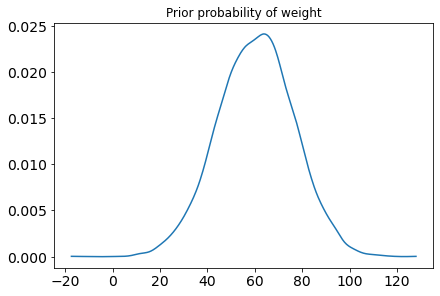

In [4]:
sample_alpha = stats.norm.rvs(loc=60, scale=15, size=10000)
sample_beta = stats.norm.rvs(loc=2, scale=2, size=10000)
sample_sigma = stats.uniform.rvs(loc=0, scale=10, size=10000)
prior_weight = stats.norm.rvs(loc=sample_alpha, scale=sample_sigma)
az.plot_kde(prior_weight)
plt.title("Prior probability of weight")

Text(0.5, 0, 'Age')

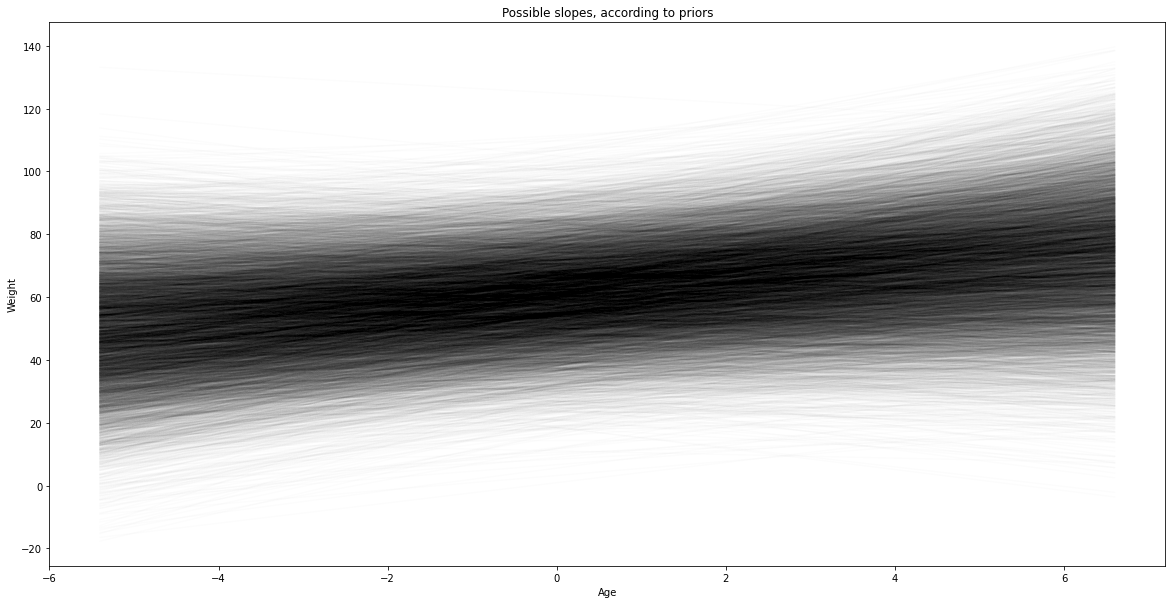

In [5]:
plt.figure(figsize=(20,10))
for i in range(1, 10000):
    plt.plot(
        df.age-df.age.mean(),
        sample_alpha[i]+sample_beta[i]*(df.age-df.age.mean()),
        color='black',
        alpha=.01)
plt.title("Possible slopes, according to priors")
plt.ylabel("Weight")
plt.xlabel("Age")

In [46]:
with open("models/w2_2.stan", "r") as f:
    model_code = f.read()

model_data = {"N":len(df),
              "weight":df.weight.tolist(),
              "age":df.age.tolist(),
              "X_BAR":df.age.mean()
             }

In [47]:
%%capture m2_build_log
m2_build = stan.build(model_code, model_data)

In [49]:
%%capture m2_fit_log
m2 = m2_build.sample(num_chains=4, num_samples=1000)

In [14]:
az.summary(m2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha        14.703  0.215  14.318   15.130      0.003    0.002    3870.0   
beta          1.339  0.054   1.236    1.439      0.001    0.001    3526.0   
sigma         2.563  0.151   2.293    2.861      0.002    0.002    3891.0   
y_pred[0]    23.542  2.566  18.912   28.460      0.041    0.029    3985.0   
y_pred[1]    18.163  2.586  13.565   23.344      0.041    0.029    4004.0   
...             ...    ...     ...      ...        ...      ...       ...   
y_pred[141]  15.528  2.614  10.487   20.224      0.043    0.031    3653.0   
y_pred[142]  16.769  2.568  12.089   21.622      0.040    0.028    4059.0   
y_pred[143]   8.762  2.613   4.035   13.782      0.042    0.030    3788.0   
y_pred[144]   8.807  2.638   3.840   13.607      0.041    0.029    4215.0   
y_pred[145]   7.506  2.642   2.564   12.432      0.042    0.030    4032.0   

             ess_tail  r_hat  
alpha          2792.0    1.0  
beta           2966.0    1.0  
sigma          2799.0    1.0  
y_pred[0]      3671.0    1.0  
y_pred[1]      3686.0    1.0  
...               ...    ...  
y_pred[141]    4012.0    1.0  
y_pred[142]    3654.0    1.0  
y_pred[143]    3798.0    1.0  
y_pred[144]    4050.0    1.0  
y_pred[145]    3691.0    1.0  

[149 rows x 9 columns]

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'y_pred'}>,
        <AxesSubplot:title={'center':'y_pred'}>]], dtype=object)

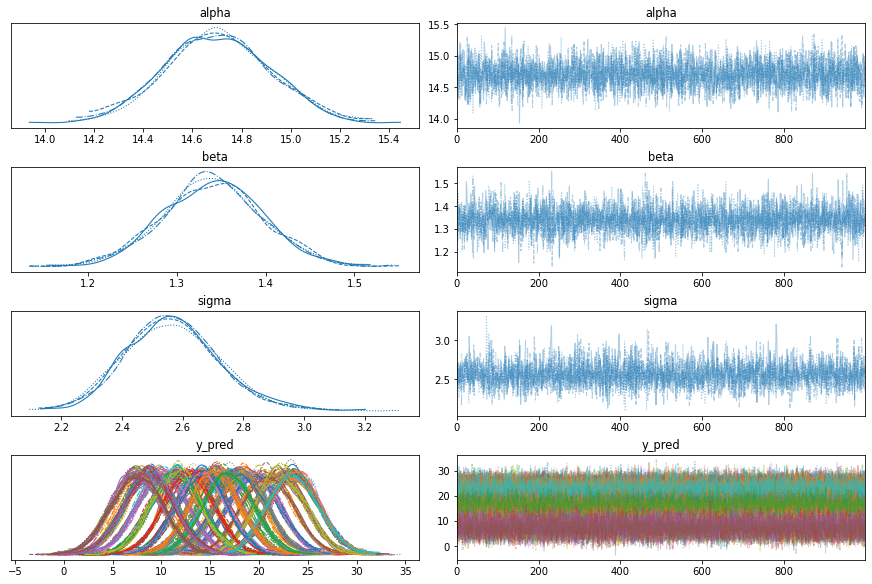

In [36]:
az.plot_trace(m2)

## Question 3

In [37]:
df["sex"] = np.where(df.male==0,1,2)

In [38]:
with open("models/w2_3.stan", "r") as f:
    model_code = f.read()

model_data = {"N":len(df),
              "weight":df.weight.tolist(),
              "age":df.age.tolist(),
              "sex":df.sex.tolist(),
              "X_BAR":df.age.mean()
             }

In [39]:
%%capture m3_build_log
m3_build = stan.build(model_code, model_data)

In [40]:
%%capture m3_fit_log
m3 = m3_build.sample(num_chains=4, num_samples=1000)

In [41]:
az.summary(m3)[0:10]

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha[0]  14.049  0.277  13.482   14.541      0.004    0.003    4682.0   
alpha[1]  15.406  0.294  14.901   16.001      0.005    0.003    4024.0   
beta[0]    1.289  0.073   1.149    1.424      0.001    0.001    5513.0   
beta[1]    1.388  0.077   1.244    1.533      0.001    0.001    5086.0   
sigma      2.479  0.149   2.215    2.768      0.002    0.002    4859.0   
mu[0]     24.563  0.581  23.498   25.647      0.008    0.006    4939.0   
mu[1]     17.399  0.338  16.768   18.038      0.005    0.003    4759.0   
mu[2]     15.465  0.290  14.906   15.996      0.004    0.003    4641.0   
mu[3]     16.110  0.302  15.579   16.715      0.004    0.003    4669.0   
mu[4]     23.175  0.516  22.195   24.101      0.007    0.005    4903.0   

          ess_tail  r_hat  
alpha[0]    2827.0    1.0  
alpha[1]    2887.0    1.0  
beta[0]     3138.0    1.0  
beta[1]     3166.0    1.0  
sigma       3073.0    1.0  
mu[0]       3212.0    1.0  
mu[1]       3135.0    1.0  
mu[2]       2841.0    1.0  
mu[3]       3175.0    1.0  
mu[4]       3210.0    1.0

Text(0.5, 0, 'Weight')

<Figure size 1440x720 with 0 Axes>

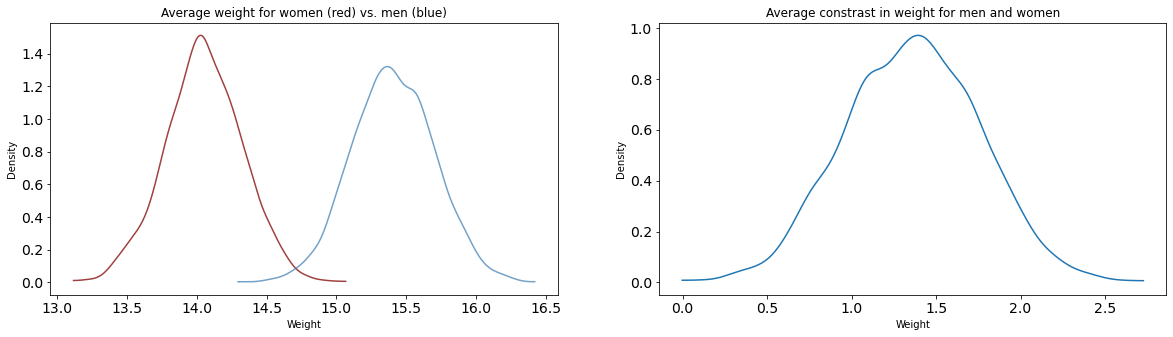

In [42]:
alpha_contrast = m3['alpha'][1] - m3['alpha'][0]

plt.figure(figsize=(20,10))
_, ax = plt.subplots(1, 2, figsize=(20,5))

az.plot_kde(m3['alpha'][0], plot_kwargs={"color":"maroon", "alpha":.75}, ax=ax[0])
ax[0].set_title("Average weight for women (red) vs. men (blue)")
ax[0].set_ylabel("Density")
ax[0].set_xlabel("Weight")

az.plot_kde(m3['alpha'][1], plot_kwargs={"color":"steelblue", "alpha":.75}, ax=ax[0])
az.plot_kde(alpha_contrast, ax=ax[1])
ax[1].set_title("Average constrast in weight for men and women")
ax[1].set_ylabel("Density")
ax[1].set_xlabel("Weight")

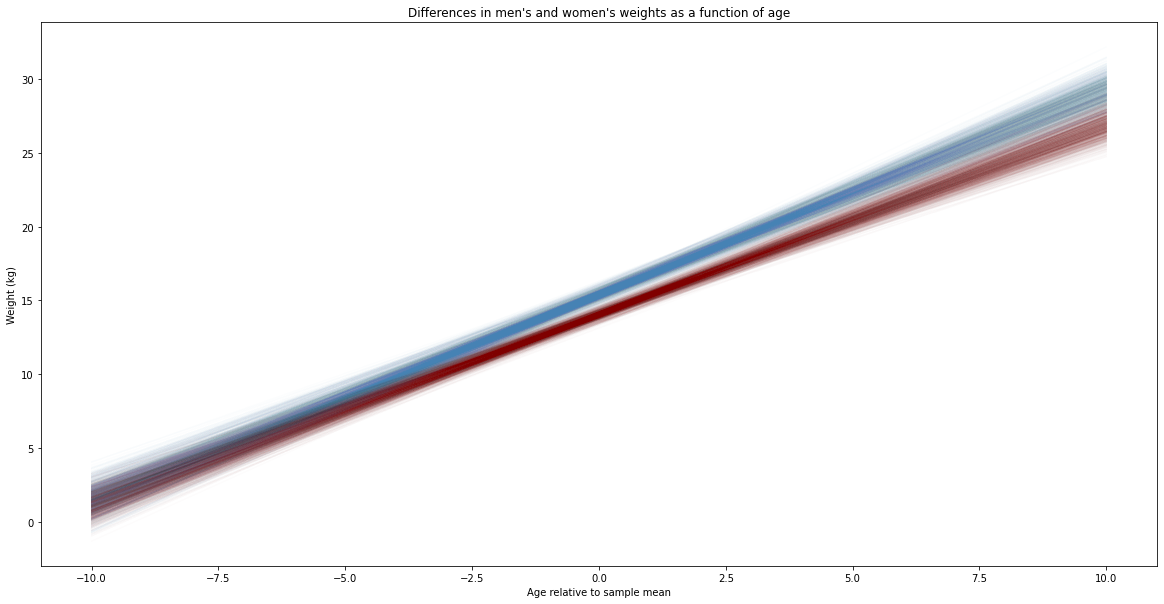

In [43]:
samples = np.random.randint(0,4000,1000)
x = np.linspace(-10, 10, 1000) 
plt.figure(figsize=(20,10))
plt.title("Differences in men's and women's weights as a function of age")
plt.ylabel("Weight (kg)")
plt.xlabel("Age relative to sample mean")

for i in samples:
    plt.plot(
        x,
        m3['alpha'][0][i]+m3['beta'][0][i]*x,
        color='maroon',
        alpha=.01)
    plt.plot(
        x,
        m3['alpha'][1][i]+m3['beta'][1][i]*x,
        color='steelblue',
        alpha=.01)

## Question 4